# Law of large numbers

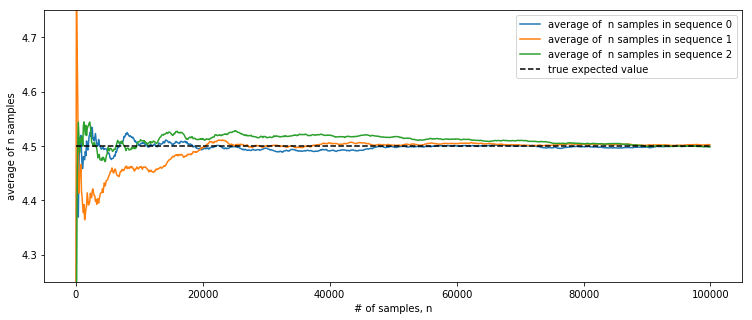

In [22]:
%matplotlib inline
import numpy as np
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt

figsize( 12.5, 5 )

# We define the distributions and the number of samples
sample_size = 100000
expected_value = lambda_ = 4.5
poi = np.random.poisson
N_samples = range(1,sample_size,100)

for k in range(3):
    
    # We generate samples for three different experiments
    samples = poi( lambda_, sample_size ) 
    
    # We take the partial average up to each point
    partial_average = [ samples[:i].mean() for i in N_samples ]
    
    plt.plot( N_samples, partial_average, lw=1.5,label="average of  n samples in sequence %d"%k)
    
# We plot a line with the expected value
plt.plot( N_samples, expected_value * np.ones_like( partial_average), 
    ls = "--", label = "true expected value", c = "k" )

plt.ylim( 4.25, 4.75) 
plt.ylabel( "average of n samples" )
plt.xlabel( "# of samples, n")
plt.legend();

## Converging to the expected value

Text(0.5,1,"How 'fast' is the sample average converging? ")

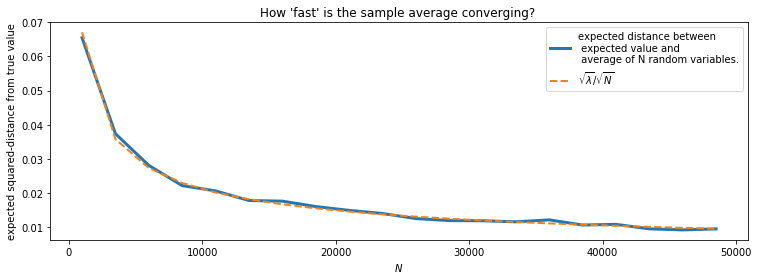

In [24]:
figsize( 12.5, 4)

N_Y = 250 #use this many to approximate D(N)
N_array = np.arange( 1000, 50000, 2500 ) #use this many samples in the approx. to the variance.
D_N_results = np.zeros( len( N_array ) )

lambda_ = 4.5 
expected_value = lambda_ #for X ~ Poi(lambda) , E[ X ] = lambda

def D_N( n ):
    """
    This function approx. D_n, the average variance of using n samples.
    """
    Z = poi( lambda_, (n, N_Y) )
    average_Z = Z.mean(axis=0)
    return np.sqrt( (  (average_Z - expected_value)**2  ).mean() )
    
    
for i,n in enumerate(N_array):
    D_N_results[i] =  D_N(n)


plt.xlabel( "N" )
plt.ylabel( "expected squared-distance from true value" )
plt.plot(N_array, D_N_results, lw = 3, 
            label="expected distance between \n expected value and \n average of N random variables.")
plt.plot( N_array, np.sqrt(expected_value)/np.sqrt(N_array), lw = 2, ls = "--", 
        label = r"$\sqrt{\lambda} / {\sqrt{N}}$" )
plt.legend()
plt.title( "How 'fast' is the sample average converging? " )

### The problem with small numbers

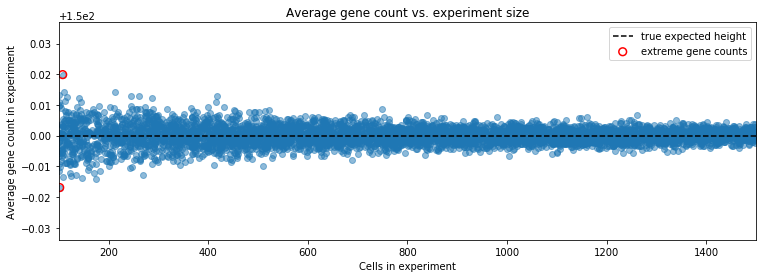

In [51]:
figsize( 12.5, 4) 

std_height = 15
mean_height = 150

n_experiments = 5000
pop_generator = np.random.randint
norm = np.random.normal

#generate some artificial numbers
population = pop_generator(100, 1500, n_experiments )

average_across_experiments = np.zeros( n_counties )
for i in range( n_experiments ):
    #generate some individuals and take the mean
    average_across_experiments[i] = norm(mean_height, 1./std_height,
                                        population[i] ).mean()
    
#located the experiments with the apparently most extreme average gene counts.
i_min = np.argmin( average_across_experiments )
i_max = np.argmax( average_across_experiments )

#plot population size vs. recorded average
plt.scatter( population, average_across_experiments, alpha = 0.5)

plt.scatter( [ population[i_min], population[i_max] ], 
           [average_across_experiments[i_min], average_across_experiments[i_max] ],
           s = 60, marker = "o", facecolors = "none",
           edgecolors = "red", linewidths = 1.5, 
            label="extreme gene counts")

plt.xlim( 100, 1500 )
plt.title( "Average gene count vs. experiment size")
plt.xlabel("Cells in experiment")
plt.ylabel("Average gene count in experiment")
plt.plot( [100, 1500], [150, 150], color = "k", label = "true expected \
height", ls="--" )
plt.legend(scatterpoints = 1);

In [18]:
print("Size of the 10 'less gene count' experiments: ")
print(population[ np.argsort( average_across_experiments )[:10] ])
print("Size of the 10 'more gene count' experiments")
print(population[ np.argsort( -average_across_experiments )[:10] ])


Size of the 10 'less gene count' experiments: 
[157 167 101 231 168 139 123 147 185 152]
Size of the 10 'more gene count' experiments
[107 129 124 148 277 253 197 111 132 292]


### Loss functions example

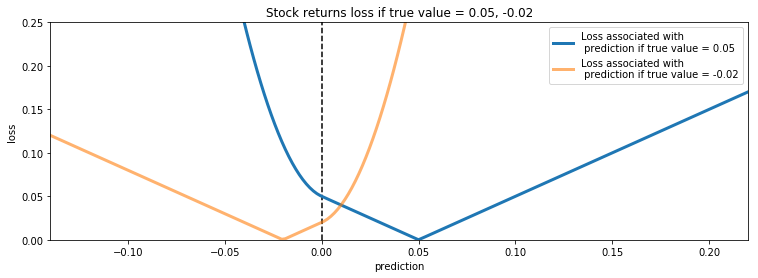

In [46]:
figsize(12.5, 4)

# yhat= estimator of y
def stock_loss(true_return, yhat, coef = 100.):
    if true_return * yhat < 0:
        #opposite signs, not good
        return coef*yhat**2 - np.sign(true_return)*yhat \
                        + abs(true_return) 
    else:
        return abs(true_return - yhat)
    
    
true_value = .05
pred = np.linspace(-.14, .22, 200)

plt.plot(pred, [stock_loss(true_value, _p) for _p in pred], \
        label = "Loss associated with\n prediction if true value = 0.05", lw =3) 
plt.vlines(0, 0, .25, linestyles="--")

plt.xlabel("prediction")
plt.ylabel("loss")
plt.xlim(-0.14, .22)
plt.ylim(0, 0.25)

true_value = -.02
plt.plot(pred, [stock_loss(true_value, _p) for _p in pred], alpha = 0.6, \
        label = "Loss associated with\n prediction if true value = -0.02", lw =3) 
plt.legend()
plt.title("Stock returns loss if true value = 0.05, -0.02");


Note the change in the shape of the loss as the prediction crosses zero. This loss reflects that the user really does not want to guess the wrong sign, especially be wrong and a large magnitude.

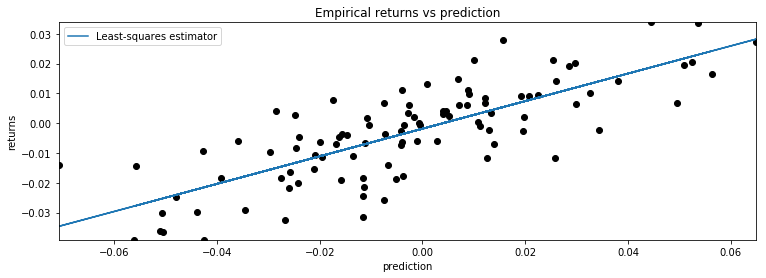

In [30]:
# Of course, any finantial data will be MUCH more complicated

## Code to create artificial finantial
N = 100
X = 0.025*np.random.randn(N)
Y = 0.5*X + 0.01*np.random.randn(N) 

ls_coef_ = np.cov(X, Y)[0,1]/np.var(X)
ls_intercept = Y.mean() - ls_coef_*X.mean()

plt.scatter(X, Y, c="k")
plt.xlabel("prediction")
plt.ylabel("returns")
plt.title("Empirical returns vs prediction")
plt.plot(X, ls_coef_*X + ls_intercept, label = "Least-squares estimator")
plt.xlim(X.min(), X.max())
plt.ylim(Y.min(), Y.max())
plt.legend(loc="upper left");

## Bayesian linear regression!
We perform a simple Bayesian linear regression on this dataset. We look for a model like:

R=α+βx+ϵ

where α,β are our unknown parameters and ϵ∼Normal(0,σ). 
The most common priors on β and α are Normal priors. 
We will also assign a prior on σ, so that σ is uniform over 0 to 100.


In [31]:
import pymc3 as pm

with pm.Model() as model:
    std = pm.Uniform("std", 0, 100)
    
    beta = pm.Normal("beta", mu=0, sd=100)
    alpha = pm.Normal("alpha", mu=0, sd=100)
    
    # Deterministic variables that depends of random variables are set like this
    mean = pm.Deterministic("mean", alpha + beta*X)
    
    # We want to adjust mean and std and we have the observed data, we link them like this.
    obs = pm.Normal("obs", mu=mean, sd=std, observed=Y)
    
    trace = pm.sample(100000, step=pm.Metropolis())
    burned_trace = trace[20000:]  

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
100%|██████████| 100500/100500 [00:32<00:00, 3062.14it/s]


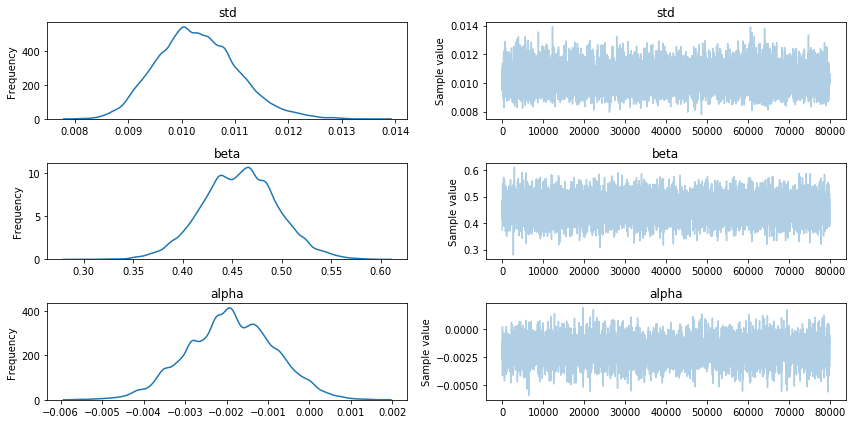

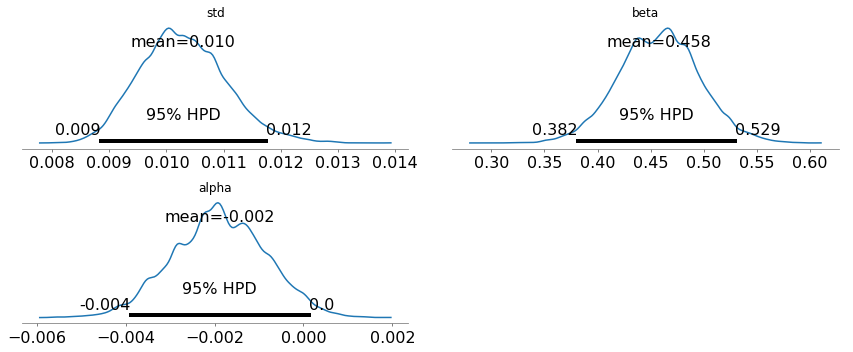

In [32]:
# PyMC3 have functions that allow us to follow for each parameter if it have converted.
# Given the following values, you think that our parameters have converged?

pm.plots.traceplot(trace=burned_trace, varnames=["std", "beta", "alpha"])
pm.plot_posterior(trace=burned_trace, varnames=["std", "beta", "alpha"], kde_plot=True);

## Our best (with respect to our loss function) prediction is to predict close to 0 to take no position.

For a specific trading signal, call it x, the distribution of possible returns has the form:

$R_i(x)=α_i+β_ix+ϵ$

where ϵ∼Normal(0,σi) and i indexes our posterior samples. We wish to find the solution to:

$argmin_r (E_{R(x)}) [L(R(x),r)]$

according to the loss given above. This r is our Bayes action for trading signal x. Below we plot the Bayes action over different trading signals. 

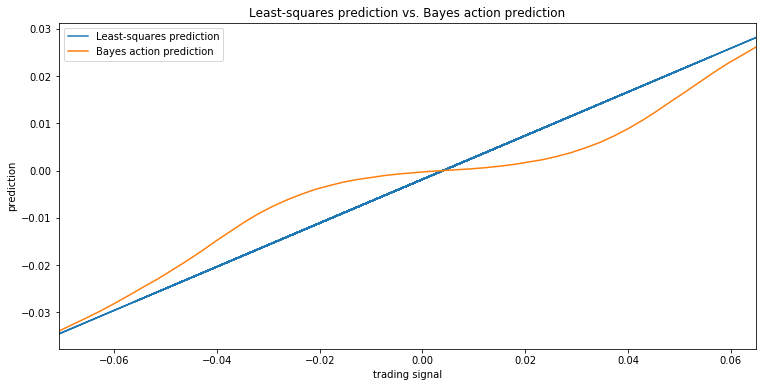

In [50]:
figsize(12.5, 6)
from scipy.optimize import fmin

# The same function that before "transformes" to work with numpy vectors
def stock_loss(price, pred, coef = 500):
    sol = np.zeros_like(price) # An array of zeros that I will fulfill
    ix = price*pred < 0 # When my prediction and my returns had different signs?
    sol[ix] = coef*pred**2 - np.sign(price[ix])*pred + abs(price[ix])
    sol[~ix] = abs(price[~ix] - pred)
    return sol

# We take the samples of the bayesian action
std_samples = burned_trace["std"]
alpha_samples = burned_trace["alpha"]
beta_samples = burned_trace["beta"]

N = std_samples.shape[0]
noise = std_samples*np.random.randn(N) 

# Here we have vectors! we have a lot of "outcomes"!
possible_outcomes = lambda signal: alpha_samples + beta_samples*signal + noise

opt_predictions = np.zeros(50) # Fifty zeros
trading_signals =  np.linspace(X.min(), X.max(), 50) # Fifty fractions of the space between the min and max X

# For all the signals of the stock market measure the outcomes of our predictions.
for i, _signal in enumerate(trading_signals):
        _possible_outcomes = possible_outcomes(_signal)
        tomin = lambda pred: stock_loss(_possible_outcomes, pred).mean()
        opt_predictions[i] = fmin(tomin, 0, disp = False) # Minimization of a function, the function tomin provided by scipy
                                                          # Going "downhill" staring from 0. Disp=False is to dont display messages
        
# We plot both the least squares predictors prediction errors and the bayes ones around zero
plt.xlabel("trading signal")
plt.ylabel("prediction")
plt.title("Least-squares prediction vs. Bayes action prediction")
plt.plot(X, ls_coef_*X + ls_intercept, label ="Least-squares prediction")
plt.xlim(X.min(), X.max())
plt.plot(trading_signals, opt_predictions, label ="Bayes action prediction")
plt.legend(loc="upper left");